# Introduction

Notebook to analyze the **False Positive** Results for each model in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner.tc_br_models_runner import TC_BR_Runner
from modules.utils import model_evaluator as m_eval
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [2]:
models_runner_4 = TC_BR_Runner()

lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df()

evaluator_4 = m_eval.ModelEvaluator(oracle)
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4],
                                       top_values=[1,3,5,10], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleVolunteers.shape: (195, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,30.77,1.93,3.57,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
1,lsi,top_1_cosine_0.1,30.77,1.93,3.57,precision recall fscore ...,0.1,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
2,lsi,top_1_cosine_0.2,30.77,1.93,3.57,precision recall fscore ...,0.2,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
3,lsi,top_1_cosine_0.3,30.77,1.93,3.57,precision recall fscore ...,0.3,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
4,lsi,top_1_cosine_0.4,28.57,1.86,3.44,precision recall fscore ...,0.4,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...


### Grouping Results by Model

### Min Precision

model
bm25          14.29
lda           10.11
lsi            0.00
wordvector     4.73
Name: perc_precision, dtype: float64



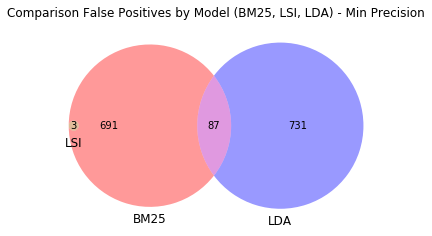

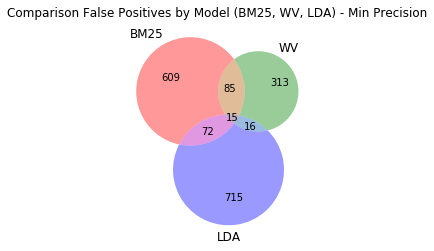

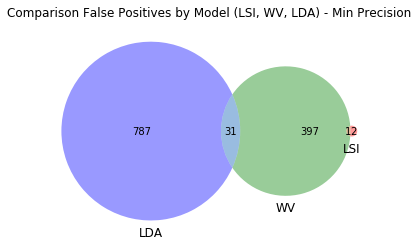

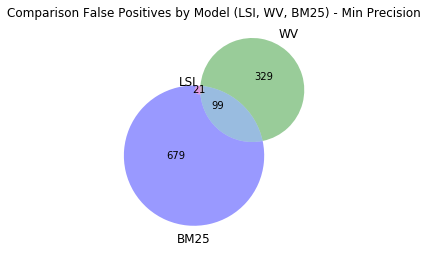

In [4]:
group = evals_df_4.groupby('model').perc_precision.min()
print(group)
print()

bm25_min_prec = group[group.index == 'bm25'].values[0]
lsi_min_prec = group[group.index == 'lsi'].values[0]
lda_min_prec = group[group.index == 'lda'].values[0]
wv_min_prec = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_min_prec))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_min_prec))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_min_prec))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_min_prec))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Min Precision')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (BM25, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [5]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set)

BM25 Exclusive TP:


{('TC_100_TRG', 'BR_1279140_SRC'),
 ('TC_100_TRG', 'BR_1279143_SRC'),
 ('TC_100_TRG', 'BR_1290424_SRC'),
 ('TC_100_TRG', 'BR_1325902_SRC'),
 ('TC_100_TRG', 'BR_1330745_SRC'),
 ('TC_100_TRG', 'BR_1339497_SRC'),
 ('TC_100_TRG', 'BR_1352539_SRC'),
 ('TC_101_TRG', 'BR_1294733_SRC'),
 ('TC_101_TRG', 'BR_1301421_SRC'),
 ('TC_101_TRG', 'BR_1312018_SRC'),
 ('TC_101_TRG', 'BR_1314643_SRC'),
 ('TC_104_TRG', 'BR_1293308_SRC'),
 ('TC_105_TRG', 'BR_1301784_SRC'),
 ('TC_105_TRG', 'BR_1328913_SRC'),
 ('TC_105_TRG', 'BR_1335538_SRC'),
 ('TC_106_TRG', 'BR_1267501_SRC'),
 ('TC_106_TRG', 'BR_1269485_SRC'),
 ('TC_106_TRG', 'BR_1297976_SRC'),
 ('TC_106_TRG', 'BR_1328913_SRC'),
 ('TC_107_TRG', 'BR_1287823_SRC'),
 ('TC_107_TRG', 'BR_1289240_SRC'),
 ('TC_107_TRG', 'BR_1301784_SRC'),
 ('TC_107_TRG', 'BR_1328913_SRC'),
 ('TC_108_TRG', 'BR_1328913_SRC'),
 ('TC_109_TRG', 'BR_1296366_SRC'),
 ('TC_109_TRG', 'BR_1313778_SRC'),
 ('TC_109_TRG', 'BR_1328913_SRC'),
 ('TC_110_TRG', 'BR_1290424_SRC'),
 ('TC_110_TRG', 'BR_



LSI Exclusive TP:


set()



LDA Exclusive TP:


{('TC_103_TRG', 'BR_1269485_SRC'),
 ('TC_103_TRG', 'BR_1325902_SRC'),
 ('TC_109_TRG', 'BR_1285328_SRC'),
 ('TC_109_TRG', 'BR_1309856_SRC'),
 ('TC_111_TRG', 'BR_1319433_SRC'),
 ('TC_111_TRG', 'BR_1345687_SRC'),
 ('TC_113_TRG', 'BR_1319433_SRC'),
 ('TC_113_TRG', 'BR_1345687_SRC'),
 ('TC_115_TRG', 'BR_1319433_SRC'),
 ('TC_115_TRG', 'BR_1345687_SRC'),
 ('TC_116_TRG', 'BR_1297686_SRC'),
 ('TC_116_TRG', 'BR_1319433_SRC'),
 ('TC_118_TRG', 'BR_1319433_SRC'),
 ('TC_122_TRG', 'BR_1257087_SRC'),
 ('TC_124_TRG', 'BR_1325902_SRC'),
 ('TC_136_TRG', 'BR_1248268_SRC'),
 ('TC_136_TRG', 'BR_1278388_SRC'),
 ('TC_136_TRG', 'BR_1281493_SRC'),
 ('TC_136_TRG', 'BR_1283542_SRC'),
 ('TC_136_TRG', 'BR_1291770_SRC'),
 ('TC_136_TRG', 'BR_1294733_SRC'),
 ('TC_136_TRG', 'BR_1294887_SRC'),
 ('TC_136_TRG', 'BR_1297336_SRC'),
 ('TC_136_TRG', 'BR_1303339_SRC'),
 ('TC_136_TRG', 'BR_1305737_SRC'),
 ('TC_136_TRG', 'BR_1319919_SRC'),
 ('TC_136_TRG', 'BR_1334844_SRC'),
 ('TC_136_TRG', 'BR_1345687_SRC'),
 ('TC_136_TRG', 'BR_



WV Exclusive TP:


{('TC_100_TRG', 'BR_1248268_SRC'),
 ('TC_100_TRG', 'BR_1292566_SRC'),
 ('TC_100_TRG', 'BR_1294733_SRC'),
 ('TC_100_TRG', 'BR_1297686_SRC'),
 ('TC_100_TRG', 'BR_1312018_SRC'),
 ('TC_100_TRG', 'BR_1319433_SRC'),
 ('TC_100_TRG', 'BR_1320557_SRC'),
 ('TC_100_TRG', 'BR_1334844_SRC'),
 ('TC_100_TRG', 'BR_1343256_SRC'),
 ('TC_101_TRG', 'BR_1292566_SRC'),
 ('TC_104_TRG', 'BR_1320557_SRC'),
 ('TC_105_TRG', 'BR_1271607_SRC'),
 ('TC_105_TRG', 'BR_1297976_SRC'),
 ('TC_106_TRG', 'BR_1345687_SRC'),
 ('TC_107_TRG', 'BR_1264988_SRC'),
 ('TC_107_TRG', 'BR_1271607_SRC'),
 ('TC_107_TRG', 'BR_1276120_SRC'),
 ('TC_107_TRG', 'BR_1297976_SRC'),
 ('TC_107_TRG', 'BR_1309856_SRC'),
 ('TC_107_TRG', 'BR_1311998_SRC'),
 ('TC_107_TRG', 'BR_1313969_SRC'),
 ('TC_107_TRG', 'BR_1318903_SRC'),
 ('TC_107_TRG', 'BR_1365887_SRC'),
 ('TC_115_TRG', 'BR_1279864_SRC'),
 ('TC_115_TRG', 'BR_1287748_SRC'),
 ('TC_115_TRG', 'BR_1337682_SRC'),
 ('TC_126_TRG', 'BR_1344446_SRC'),
 ('TC_128_TRG', 'BR_1301056_SRC'),
 ('TC_128_TRG', 'BR_

In [6]:
print("LSI FP Amount: {}".format(len(lsi_fp_set)))
print("LDA FP Amount: {}".format(len(lda_fp_set)))
print("BM25 FP Amount: {}".format(len(bm25_fp_set)))
print("WV FP Amount: {}".format(len(wv_fp_set)))

LSI FP Amount: 3
LDA FP Amount: 818
BM25 FP Amount: 781
WV FP Amount: 429


#### Min Recall

model
bm25          1.54
lda           0.56
lsi           0.00
wordvector    0.38
Name: perc_recall, dtype: float64



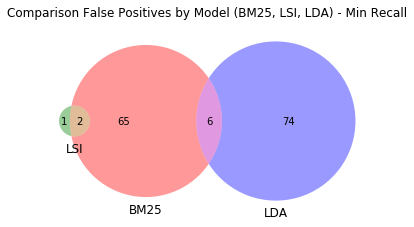

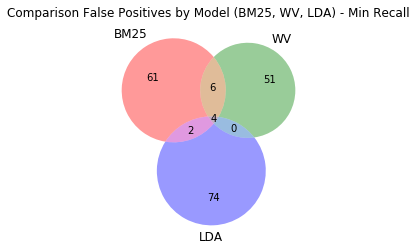

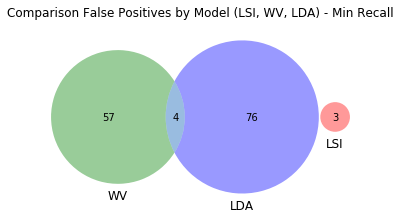

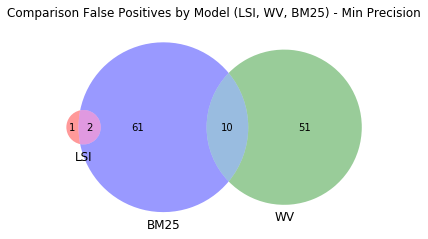

In [7]:
group = evals_df_4.groupby('model').perc_recall.min()
print(group)
print()

bm25_min_recall = group[group.index == 'bm25'].values[0]
lsi_min_recall = group[group.index == 'lsi'].values[0]
lda_min_recall = group[group.index == 'lda'].values[0]
wv_min_recall = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_min_recall))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_min_recall))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_min_recall))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_min_recall))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Min Recall')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (BM25, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Min Recall')
plt.show()

##### Exclusive Cases

In [8]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set)

BM25 Exclusive FP:


{('TC_100_TRG', 'BR_1301421_SRC'),
 ('TC_107_TRG', 'BR_1328913_SRC'),
 ('TC_109_TRG', 'BR_1271607_SRC'),
 ('TC_115_TRG', 'BR_1319919_SRC'),
 ('TC_121_TRG', 'BR_1313290_SRC'),
 ('TC_121_TRG', 'BR_1319119_SRC'),
 ('TC_121_TRG', 'BR_1339497_SRC'),
 ('TC_122_TRG', 'BR_1302468_SRC'),
 ('TC_127_TRG', 'BR_1276120_SRC'),
 ('TC_135_TRG', 'BR_1267501_SRC'),
 ('TC_135_TRG', 'BR_1269485_SRC'),
 ('TC_137_TRG', 'BR_1283542_SRC'),
 ('TC_137_TRG', 'BR_1336227_SRC'),
 ('TC_137_TRG', 'BR_1451475_SRC'),
 ('TC_142_TRG', 'BR_1287384_SRC'),
 ('TC_146_TRG', 'BR_1270983_SRC'),
 ('TC_149_TRG', 'BR_1281190_SRC'),
 ('TC_14_TRG', 'BR_1282759_SRC'),
 ('TC_160_TRG', 'BR_1264988_SRC'),
 ('TC_162_TRG', 'BR_1267480_SRC'),
 ('TC_162_TRG', 'BR_1278388_SRC'),
 ('TC_162_TRG', 'BR_1305676_SRC'),
 ('TC_162_TRG', 'BR_1305737_SRC'),
 ('TC_163_TRG', 'BR_1285328_SRC'),
 ('TC_163_TRG', 'BR_1290424_SRC'),
 ('TC_163_TRG', 'BR_1365887_SRC'),
 ('TC_174_TRG', 'BR_1297686_SRC'),
 ('TC_175_TRG', 'BR_1285041_SRC'),
 ('TC_17_TRG', 'BR_12



LSI Exclusive FP:


{('TC_61_TRG', 'BR_1287748_SRC')}



LDA Exclusive FP:


{('TC_143_TRG', 'BR_1430603_SRC'),
 ('TC_14_TRG', 'BR_1297686_SRC'),
 ('TC_159_TRG', 'BR_1264988_SRC'),
 ('TC_159_TRG', 'BR_1276120_SRC'),
 ('TC_159_TRG', 'BR_1277937_SRC'),
 ('TC_159_TRG', 'BR_1287823_SRC'),
 ('TC_159_TRG', 'BR_1289240_SRC'),
 ('TC_159_TRG', 'BR_1290424_SRC'),
 ('TC_159_TRG', 'BR_1293308_SRC'),
 ('TC_159_TRG', 'BR_1295502_SRC'),
 ('TC_159_TRG', 'BR_1296322_SRC'),
 ('TC_159_TRG', 'BR_1296861_SRC'),
 ('TC_159_TRG', 'BR_1297976_SRC'),
 ('TC_159_TRG', 'BR_1301056_SRC'),
 ('TC_159_TRG', 'BR_1301421_SRC'),
 ('TC_159_TRG', 'BR_1305195_SRC'),
 ('TC_159_TRG', 'BR_1313778_SRC'),
 ('TC_159_TRG', 'BR_1318903_SRC'),
 ('TC_159_TRG', 'BR_1336227_SRC'),
 ('TC_159_TRG', 'BR_1343256_SRC'),
 ('TC_159_TRG', 'BR_1353831_SRC'),
 ('TC_160_TRG', 'BR_1305737_SRC'),
 ('TC_161_TRG', 'BR_1303339_SRC'),
 ('TC_16_TRG', 'BR_1345687_SRC'),
 ('TC_174_TRG', 'BR_1248267_SRC'),
 ('TC_174_TRG', 'BR_1269485_SRC'),
 ('TC_176_TRG', 'BR_1432915_SRC'),
 ('TC_17_TRG', 'BR_1319919_SRC'),
 ('TC_17_TRG', 'BR_1335



WV Exclusive FP:


{('TC_100_TRG', 'BR_1292566_SRC'),
 ('TC_107_TRG', 'BR_1271607_SRC'),
 ('TC_128_TRG', 'BR_1292573_SRC'),
 ('TC_128_TRG', 'BR_1323211_SRC'),
 ('TC_128_TRG', 'BR_1344446_SRC'),
 ('TC_130_TRG', 'BR_1279864_SRC'),
 ('TC_130_TRG', 'BR_1281493_SRC'),
 ('TC_130_TRG', 'BR_1301421_SRC'),
 ('TC_130_TRG', 'BR_1319433_SRC'),
 ('TC_130_TRG', 'BR_1336227_SRC'),
 ('TC_131_TRG', 'BR_1302468_SRC'),
 ('TC_132_TRG', 'BR_1264988_SRC'),
 ('TC_132_TRG', 'BR_1287384_SRC'),
 ('TC_132_TRG', 'BR_1287748_SRC'),
 ('TC_135_TRG', 'BR_1289240_SRC'),
 ('TC_135_TRG', 'BR_1297686_SRC'),
 ('TC_135_TRG', 'BR_1311998_SRC'),
 ('TC_135_TRG', 'BR_1318903_SRC'),
 ('TC_135_TRG', 'BR_1319119_SRC'),
 ('TC_135_TRG', 'BR_1330745_SRC'),
 ('TC_135_TRG', 'BR_1334844_SRC'),
 ('TC_135_TRG', 'BR_1365887_SRC'),
 ('TC_136_TRG', 'BR_1282759_SRC'),
 ('TC_137_TRG', 'BR_1320557_SRC'),
 ('TC_152_TRG', 'BR_1297336_SRC'),
 ('TC_175_TRG', 'BR_1313969_SRC'),
 ('TC_175_TRG', 'BR_1339497_SRC'),
 ('TC_27_TRG', 'BR_1313778_SRC'),
 ('TC_32_TRG', 'BR_12

#### Max Precision

model
bm25          19.78
lda           12.82
lsi           30.77
wordvector     6.96
Name: perc_precision, dtype: float64



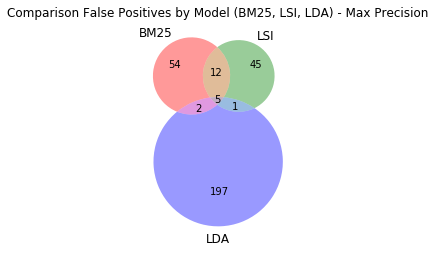

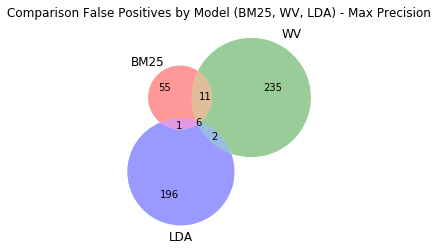

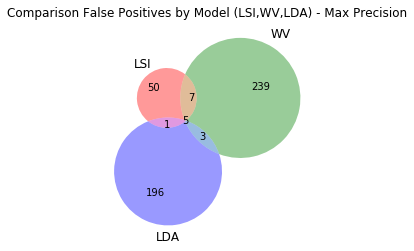

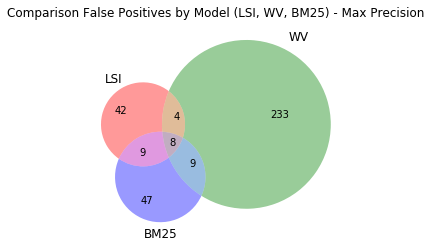

In [9]:
group = evals_df_4.groupby('model').perc_precision.max()
print(group)
print()

bm25_max_prec = group[group.index == 'bm25'].values[0]
lsi_max_prec = group[group.index == 'lsi'].values[0]
lda_max_prec = group[group.index == 'lda'].values[0]
wv_max_prec = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_max_prec))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_max_prec))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_max_prec))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_max_prec))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Max Precision')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (BM25, WV, LDA) - Max Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI,WV,LDA) - Max Precision')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Max Precision')
plt.show()

##### Exclusive Cases

In [11]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set)

BM25 Exclusive FP:


{('TC_100_TRG', 'BR_1301421_SRC'),
 ('TC_107_TRG', 'BR_1328913_SRC'),
 ('TC_115_TRG', 'BR_1319919_SRC'),
 ('TC_121_TRG', 'BR_1313290_SRC'),
 ('TC_121_TRG', 'BR_1319119_SRC'),
 ('TC_121_TRG', 'BR_1339497_SRC'),
 ('TC_122_TRG', 'BR_1302468_SRC'),
 ('TC_127_TRG', 'BR_1276120_SRC'),
 ('TC_135_TRG', 'BR_1267501_SRC'),
 ('TC_135_TRG', 'BR_1269485_SRC'),
 ('TC_137_TRG', 'BR_1283542_SRC'),
 ('TC_137_TRG', 'BR_1451475_SRC'),
 ('TC_142_TRG', 'BR_1287384_SRC'),
 ('TC_146_TRG', 'BR_1270983_SRC'),
 ('TC_149_TRG', 'BR_1281190_SRC'),
 ('TC_160_TRG', 'BR_1264988_SRC'),
 ('TC_162_TRG', 'BR_1267480_SRC'),
 ('TC_162_TRG', 'BR_1278388_SRC'),
 ('TC_162_TRG', 'BR_1305676_SRC'),
 ('TC_162_TRG', 'BR_1305737_SRC'),
 ('TC_163_TRG', 'BR_1285328_SRC'),
 ('TC_163_TRG', 'BR_1290424_SRC'),
 ('TC_163_TRG', 'BR_1365887_SRC'),
 ('TC_174_TRG', 'BR_1297686_SRC'),
 ('TC_175_TRG', 'BR_1285041_SRC'),
 ('TC_17_TRG', 'BR_1287687_SRC'),
 ('TC_17_TRG', 'BR_1357085_SRC'),
 ('TC_183_TRG', 'BR_1449700_SRC'),
 ('TC_203_TRG', 'BR_12



LSI Exclusive FP:


{('TC_105_TRG', 'BR_1313969_SRC'),
 ('TC_119_TRG', 'BR_1279143_SRC'),
 ('TC_119_TRG', 'BR_1323211_SRC'),
 ('TC_123_TRG', 'BR_1357085_SRC'),
 ('TC_128_TRG', 'BR_1325902_SRC'),
 ('TC_128_TRG', 'BR_1337682_SRC'),
 ('TC_130_TRG', 'BR_1302468_SRC'),
 ('TC_15_TRG', 'BR_1301784_SRC'),
 ('TC_163_TRG', 'BR_1267480_SRC'),
 ('TC_163_TRG', 'BR_1278388_SRC'),
 ('TC_186_TRG', 'BR_1276120_SRC'),
 ('TC_186_TRG', 'BR_1336227_SRC'),
 ('TC_18_TRG', 'BR_1290424_SRC'),
 ('TC_190_TRG', 'BR_1281190_SRC'),
 ('TC_191_TRG', 'BR_1305737_SRC'),
 ('TC_191_TRG', 'BR_1316126_SRC'),
 ('TC_191_TRG', 'BR_1449700_SRC'),
 ('TC_195_TRG', 'BR_1287687_SRC'),
 ('TC_198_TRG', 'BR_1279864_SRC'),
 ('TC_20_TRG', 'BR_1285041_SRC'),
 ('TC_20_TRG', 'BR_1305676_SRC'),
 ('TC_21_TRG', 'BR_1281493_SRC'),
 ('TC_22_TRG', 'BR_1430603_SRC'),
 ('TC_23_TRG', 'BR_1257087_SRC'),
 ('TC_23_TRG', 'BR_1285328_SRC'),
 ('TC_30_TRG', 'BR_1313290_SRC'),
 ('TC_45_TRG', 'BR_1269485_SRC'),
 ('TC_45_TRG', 'BR_1344446_SRC'),
 ('TC_60_TRG', 'BR_1313778_SRC'



LDA Exclusive FP:


{('TC_116_TRG', 'BR_1319433_SRC'),
 ('TC_122_TRG', 'BR_1257087_SRC'),
 ('TC_136_TRG', 'BR_1294887_SRC'),
 ('TC_136_TRG', 'BR_1297336_SRC'),
 ('TC_136_TRG', 'BR_1345687_SRC'),
 ('TC_13_TRG', 'BR_1305676_SRC'),
 ('TC_140_TRG', 'BR_1319433_SRC'),
 ('TC_143_TRG', 'BR_1430603_SRC'),
 ('TC_149_TRG', 'BR_1257087_SRC'),
 ('TC_14_TRG', 'BR_1297686_SRC'),
 ('TC_14_TRG', 'BR_1319919_SRC'),
 ('TC_14_TRG', 'BR_1345687_SRC'),
 ('TC_154_TRG', 'BR_1309856_SRC'),
 ('TC_155_TRG', 'BR_1328913_SRC'),
 ('TC_156_TRG', 'BR_1300738_SRC'),
 ('TC_156_TRG', 'BR_1313778_SRC'),
 ('TC_156_TRG', 'BR_1328913_SRC'),
 ('TC_159_TRG', 'BR_1264988_SRC'),
 ('TC_159_TRG', 'BR_1270274_SRC'),
 ('TC_159_TRG', 'BR_1276120_SRC'),
 ('TC_159_TRG', 'BR_1277937_SRC'),
 ('TC_159_TRG', 'BR_1287823_SRC'),
 ('TC_159_TRG', 'BR_1289240_SRC'),
 ('TC_159_TRG', 'BR_1290424_SRC'),
 ('TC_159_TRG', 'BR_1293308_SRC'),
 ('TC_159_TRG', 'BR_1295502_SRC'),
 ('TC_159_TRG', 'BR_1296322_SRC'),
 ('TC_159_TRG', 'BR_1296861_SRC'),
 ('TC_159_TRG', 'BR_1297



WV Exclusive FP:


{('TC_100_TRG', 'BR_1269348_SRC'),
 ('TC_100_TRG', 'BR_1282759_SRC'),
 ('TC_100_TRG', 'BR_1292566_SRC'),
 ('TC_100_TRG', 'BR_1297374_SRC'),
 ('TC_100_TRG', 'BR_1313290_SRC'),
 ('TC_100_TRG', 'BR_1335992_SRC'),
 ('TC_100_TRG', 'BR_1357085_SRC'),
 ('TC_100_TRG', 'BR_1451475_SRC'),
 ('TC_104_TRG', 'BR_1320557_SRC'),
 ('TC_105_TRG', 'BR_1271607_SRC'),
 ('TC_105_TRG', 'BR_1297976_SRC'),
 ('TC_107_TRG', 'BR_1271607_SRC'),
 ('TC_107_TRG', 'BR_1276120_SRC'),
 ('TC_107_TRG', 'BR_1287384_SRC'),
 ('TC_107_TRG', 'BR_1297976_SRC'),
 ('TC_122_TRG', 'BR_1316126_SRC'),
 ('TC_125_TRG', 'BR_1292573_SRC'),
 ('TC_128_TRG', 'BR_1292573_SRC'),
 ('TC_128_TRG', 'BR_1319433_SRC'),
 ('TC_128_TRG', 'BR_1323211_SRC'),
 ('TC_128_TRG', 'BR_1344446_SRC'),
 ('TC_129_TRG', 'BR_1287687_SRC'),
 ('TC_130_TRG', 'BR_1269348_SRC'),
 ('TC_130_TRG', 'BR_1279864_SRC'),
 ('TC_130_TRG', 'BR_1281493_SRC'),
 ('TC_130_TRG', 'BR_1282759_SRC'),
 ('TC_130_TRG', 'BR_1285041_SRC'),
 ('TC_130_TRG', 'BR_1287687_SRC'),
 ('TC_130_TRG', 'BR_

In [12]:
print("LSI FP Amount: {}".format(len(lsi_fp_set)))
print("LDA FP Amount: {}".format(len(lda_fp_set)))
print("BM25 FP Amount: {}".format(len(bm25_fp_set)))
print("WV FP Amount: {}".format(len(wv_fp_set)))

LSI FP Amount: 63
LDA FP Amount: 205
BM25 FP Amount: 73
WV FP Amount: 254


#### Max Recall

model
bm25           9.54
lda            5.55
lsi           14.42
wordvector     3.22
Name: perc_recall, dtype: float64



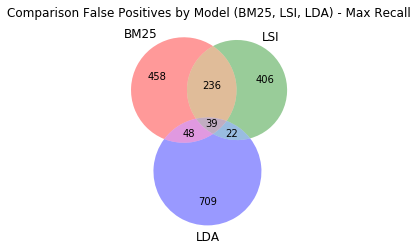

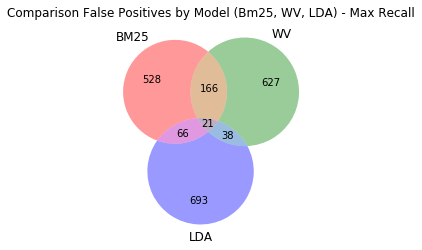

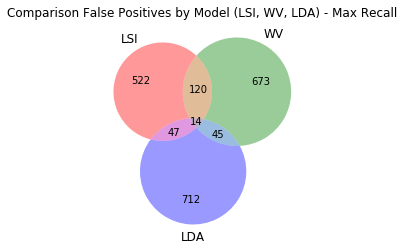

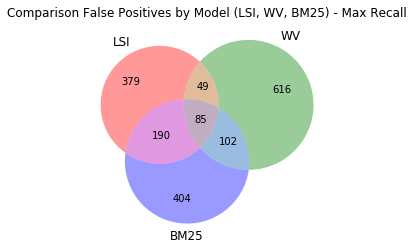

In [13]:
group = evals_df_4.groupby('model').perc_recall.max()
print(group)
print()

bm25_max_recall = group[group.index == 'bm25'].values[0]
lsi_max_recall = group[group.index == 'lsi'].values[0]
lda_max_recall = group[group.index == 'lda'].values[0]
wv_max_recall = group[group.index == 'wordvector'].values[0]

bm25_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_max_recall))
lsi_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_max_recall))
lda_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_max_recall))
wv_fp_set = aux_functions.get_false_positives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_max_recall))

venn3([bm25_fp_set, lsi_fp_set, lda_fp_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Positives by Model (BM25, LSI, LDA) - Max Recall')
plt.show()

venn3([bm25_fp_set, wv_fp_set, lda_fp_set], ['BM25','WV','LDA'])
plt.title('Comparison False Positives by Model (Bm25, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, lda_fp_set], ['LSI','WV','LDA'])
plt.title('Comparison False Positives by Model (LSI, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_fp_set, wv_fp_set, bm25_fp_set], ['LSI','WV','BM25'])
plt.title('Comparison False Positives by Model (LSI, WV, BM25) - Max Recall')
plt.show()

##### Exclusive Cases

In [14]:
print("BM25 Exclusive FP:")
display(bm25_fp_set - lsi_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLSI Exclusive FP:")
display(lsi_fp_set - bm25_fp_set - lda_fp_set - wv_fp_set)

print("\n\nLDA Exclusive FP:")
display(lda_fp_set - lsi_fp_set - bm25_fp_set - wv_fp_set)

print("\n\nWV Exclusive FP:")
display(wv_fp_set - lda_fp_set - lsi_fp_set - bm25_fp_set)

BM25 Exclusive FP:


{('TC_100_TRG', 'BR_1279140_SRC'),
 ('TC_100_TRG', 'BR_1279143_SRC'),
 ('TC_100_TRG', 'BR_1325902_SRC'),
 ('TC_100_TRG', 'BR_1330745_SRC'),
 ('TC_100_TRG', 'BR_1339497_SRC'),
 ('TC_101_TRG', 'BR_1294733_SRC'),
 ('TC_101_TRG', 'BR_1301421_SRC'),
 ('TC_101_TRG', 'BR_1312018_SRC'),
 ('TC_104_TRG', 'BR_1293308_SRC'),
 ('TC_105_TRG', 'BR_1301784_SRC'),
 ('TC_106_TRG', 'BR_1267501_SRC'),
 ('TC_106_TRG', 'BR_1269485_SRC'),
 ('TC_107_TRG', 'BR_1287823_SRC'),
 ('TC_108_TRG', 'BR_1328913_SRC'),
 ('TC_109_TRG', 'BR_1296366_SRC'),
 ('TC_109_TRG', 'BR_1313778_SRC'),
 ('TC_109_TRG', 'BR_1328913_SRC'),
 ('TC_110_TRG', 'BR_1290424_SRC'),
 ('TC_110_TRG', 'BR_1353831_SRC'),
 ('TC_113_TRG', 'BR_1282759_SRC'),
 ('TC_114_TRG', 'BR_1292573_SRC'),
 ('TC_115_TRG', 'BR_1279140_SRC'),
 ('TC_116_TRG', 'BR_1319919_SRC'),
 ('TC_118_TRG', 'BR_1319919_SRC'),
 ('TC_120_TRG', 'BR_1302468_SRC'),
 ('TC_120_TRG', 'BR_1313290_SRC'),
 ('TC_120_TRG', 'BR_1339497_SRC'),
 ('TC_121_TRG', 'BR_1287748_SRC'),
 ('TC_121_TRG', 'BR_



LSI Exclusive FP:


{('TC_101_TRG', 'BR_1269485_SRC'),
 ('TC_101_TRG', 'BR_1287823_SRC'),
 ('TC_101_TRG', 'BR_1330745_SRC'),
 ('TC_102_TRG', 'BR_1305676_SRC'),
 ('TC_105_TRG', 'BR_1276120_SRC'),
 ('TC_105_TRG', 'BR_1281190_SRC'),
 ('TC_105_TRG', 'BR_1311998_SRC'),
 ('TC_105_TRG', 'BR_1313969_SRC'),
 ('TC_105_TRG', 'BR_1318903_SRC'),
 ('TC_105_TRG', 'BR_1336227_SRC'),
 ('TC_106_TRG', 'BR_1271607_SRC'),
 ('TC_106_TRG', 'BR_1281190_SRC'),
 ('TC_106_TRG', 'BR_1311998_SRC'),
 ('TC_106_TRG', 'BR_1335538_SRC'),
 ('TC_106_TRG', 'BR_1336227_SRC'),
 ('TC_106_TRG', 'BR_1357085_SRC'),
 ('TC_108_TRG', 'BR_1271607_SRC'),
 ('TC_108_TRG', 'BR_1276120_SRC'),
 ('TC_108_TRG', 'BR_1281190_SRC'),
 ('TC_108_TRG', 'BR_1311998_SRC'),
 ('TC_108_TRG', 'BR_1336227_SRC'),
 ('TC_109_TRG', 'BR_1276120_SRC'),
 ('TC_109_TRG', 'BR_1281190_SRC'),
 ('TC_109_TRG', 'BR_1311998_SRC'),
 ('TC_109_TRG', 'BR_1313969_SRC'),
 ('TC_109_TRG', 'BR_1335538_SRC'),
 ('TC_109_TRG', 'BR_1336227_SRC'),
 ('TC_110_TRG', 'BR_1279140_SRC'),
 ('TC_111_TRG', 'BR_



LDA Exclusive FP:


{('TC_103_TRG', 'BR_1269485_SRC'),
 ('TC_103_TRG', 'BR_1325902_SRC'),
 ('TC_109_TRG', 'BR_1285328_SRC'),
 ('TC_109_TRG', 'BR_1309856_SRC'),
 ('TC_111_TRG', 'BR_1319433_SRC'),
 ('TC_111_TRG', 'BR_1345687_SRC'),
 ('TC_113_TRG', 'BR_1319433_SRC'),
 ('TC_113_TRG', 'BR_1345687_SRC'),
 ('TC_115_TRG', 'BR_1319433_SRC'),
 ('TC_115_TRG', 'BR_1345687_SRC'),
 ('TC_116_TRG', 'BR_1297686_SRC'),
 ('TC_116_TRG', 'BR_1319433_SRC'),
 ('TC_118_TRG', 'BR_1319433_SRC'),
 ('TC_122_TRG', 'BR_1257087_SRC'),
 ('TC_124_TRG', 'BR_1325902_SRC'),
 ('TC_136_TRG', 'BR_1248268_SRC'),
 ('TC_136_TRG', 'BR_1278388_SRC'),
 ('TC_136_TRG', 'BR_1281493_SRC'),
 ('TC_136_TRG', 'BR_1291770_SRC'),
 ('TC_136_TRG', 'BR_1294733_SRC'),
 ('TC_136_TRG', 'BR_1294887_SRC'),
 ('TC_136_TRG', 'BR_1297336_SRC'),
 ('TC_136_TRG', 'BR_1305737_SRC'),
 ('TC_136_TRG', 'BR_1319919_SRC'),
 ('TC_136_TRG', 'BR_1334844_SRC'),
 ('TC_136_TRG', 'BR_1345687_SRC'),
 ('TC_136_TRG', 'BR_1365887_SRC'),
 ('TC_136_TRG', 'BR_1449700_SRC'),
 ('TC_13_TRG', 'BR_1



WV Exclusive FP:


{('TC_100_TRG', 'BR_1248268_SRC'),
 ('TC_100_TRG', 'BR_1257087_SRC'),
 ('TC_100_TRG', 'BR_1269348_SRC'),
 ('TC_100_TRG', 'BR_1282759_SRC'),
 ('TC_100_TRG', 'BR_1285328_SRC'),
 ('TC_100_TRG', 'BR_1287687_SRC'),
 ('TC_100_TRG', 'BR_1292566_SRC'),
 ('TC_100_TRG', 'BR_1294733_SRC'),
 ('TC_100_TRG', 'BR_1297686_SRC'),
 ('TC_100_TRG', 'BR_1312018_SRC'),
 ('TC_100_TRG', 'BR_1313290_SRC'),
 ('TC_100_TRG', 'BR_1313778_SRC'),
 ('TC_100_TRG', 'BR_1319433_SRC'),
 ('TC_100_TRG', 'BR_1320557_SRC'),
 ('TC_100_TRG', 'BR_1323211_SRC'),
 ('TC_100_TRG', 'BR_1334844_SRC'),
 ('TC_100_TRG', 'BR_1335992_SRC'),
 ('TC_100_TRG', 'BR_1343256_SRC'),
 ('TC_100_TRG', 'BR_1357085_SRC'),
 ('TC_100_TRG', 'BR_1430603_SRC'),
 ('TC_100_TRG', 'BR_1451475_SRC'),
 ('TC_101_TRG', 'BR_1292566_SRC'),
 ('TC_101_TRG', 'BR_1313778_SRC'),
 ('TC_104_TRG', 'BR_1285041_SRC'),
 ('TC_105_TRG', 'BR_1297976_SRC'),
 ('TC_106_TRG', 'BR_1319919_SRC'),
 ('TC_107_TRG', 'BR_1264988_SRC'),
 ('TC_107_TRG', 'BR_1287384_SRC'),
 ('TC_107_TRG', 'BR_

In [15]:
print("LSI FP Amount: {}".format(len(lsi_fp_set)))
print("LDA FP Amount: {}".format(len(lda_fp_set)))
print("BM25 FP Amount: {}".format(len(bm25_fp_set)))
print("WV FP Amount: {}".format(len(wv_fp_set)))

LSI FP Amount: 703
LDA FP Amount: 818
BM25 FP Amount: 781
WV FP Amount: 852
